1.   Age
2.   Gender
3.   Sleep Duration= Slpdrn
4.   Exercise frequency= Exerq
5.   Social Support Level= Ssl
6.   Work Stress Level= Wsl
7.   Alcohol Consumption= Alcsm
8.   Smoking Habit= Smkhbt
9.   Financial Stress= Fist
10.  Diet Quaility= Diqlt
11.  Family History of Mental illness= Fhomi
12.  Relationship Satisfaction= Rlst
13.  Substance use History= Suh
14.  Self-Esteem Score= Ses
15.  Social Media usage= Smu
16.  Anxiety Level= Alvl
17.  Depression Level= Dplvl
18.  work-life balance= Wlb
19.  Traumatic Experience history= Teh
20.  Mental Health Score= Mhs



In [ ]:
# Data Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Set the style for our plots
plt.style.use('default')

# Load the dataset
df = pd.read_csv('/content/Mental_Health_final.csv')

# Check the shape of the dataset
print("Dataset shape:", df.shape)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handling Missing Values: Drop rows with excessive missing data
df = df.dropna()
print("Rows after dropping missing values:", df.shape)


Dataset shape: (1500, 20)
Missing values in each column:
Age       75
Gender    75
Slpdrn    75
Exerq     75
Ssl       75
Wsl       75
Alcsm     75
Smkhbt    75
Fist      75
Diqlt     75
Fhomi     75
Rlst      75
Suh       75
Ses       75
Smu       75
Alvl      75
Dplvl     75
Wlb       75
Teh       75
Mhs       75
dtype: int64
Rows after dropping missing values: (525, 20)


In [ ]:
# Display the first few rows of the preprocessed data
print("First 5 rows of the preprocessed data:")
print(df.head())

# Summary statistics of the preprocessed data
print("Summary statistics of the preprocessed data:")
print(df.describe())

First 5 rows of the preprocessed data:
    Age  Gender  Slpdrn  Exerq   Ssl   Wsl  Alcsm Smkhbt  Fist  Diqlt Fhomi  \
0  56.0  Female    7.80   3.29  4.45  3.05   8.15     No  7.98   1.98   Yes   
2  32.0  Female    7.75   3.10  4.38  2.03  13.28    Yes  2.26   1.76    No   
4  25.0  Female    6.35   5.58  5.37  1.61   1.38     No  4.89   0.54   Yes   
5  38.0    Male    5.81   4.09  4.38  1.42   8.09     No  1.92   1.46    No   
6  56.0  Female    6.04   2.45  2.72  2.47  10.30     No  9.61   4.00    No   

   Rlst Suh    Ses   Smu  Alvl  Dplvl   Wlb  Teh    Mhs  
0  5.07  No  32.43  4.85  3.09   4.27  4.53   No  77.85  
2  4.18  No  24.41  4.37  7.63   8.95  4.61   No  65.47  
4  3.95  No  36.51  5.96  9.80   8.99  2.30  Yes  54.32  
5  5.18  No  36.86  2.41  6.58   2.61  5.20   No  98.21  
6  5.29  No   3.11  2.91  2.29   4.89  4.25   No  70.82  
Summary statistics of the preprocessed data:
              Age      Slpdrn       Exerq         Ssl         Wsl       Alcsm  \
count  525.0

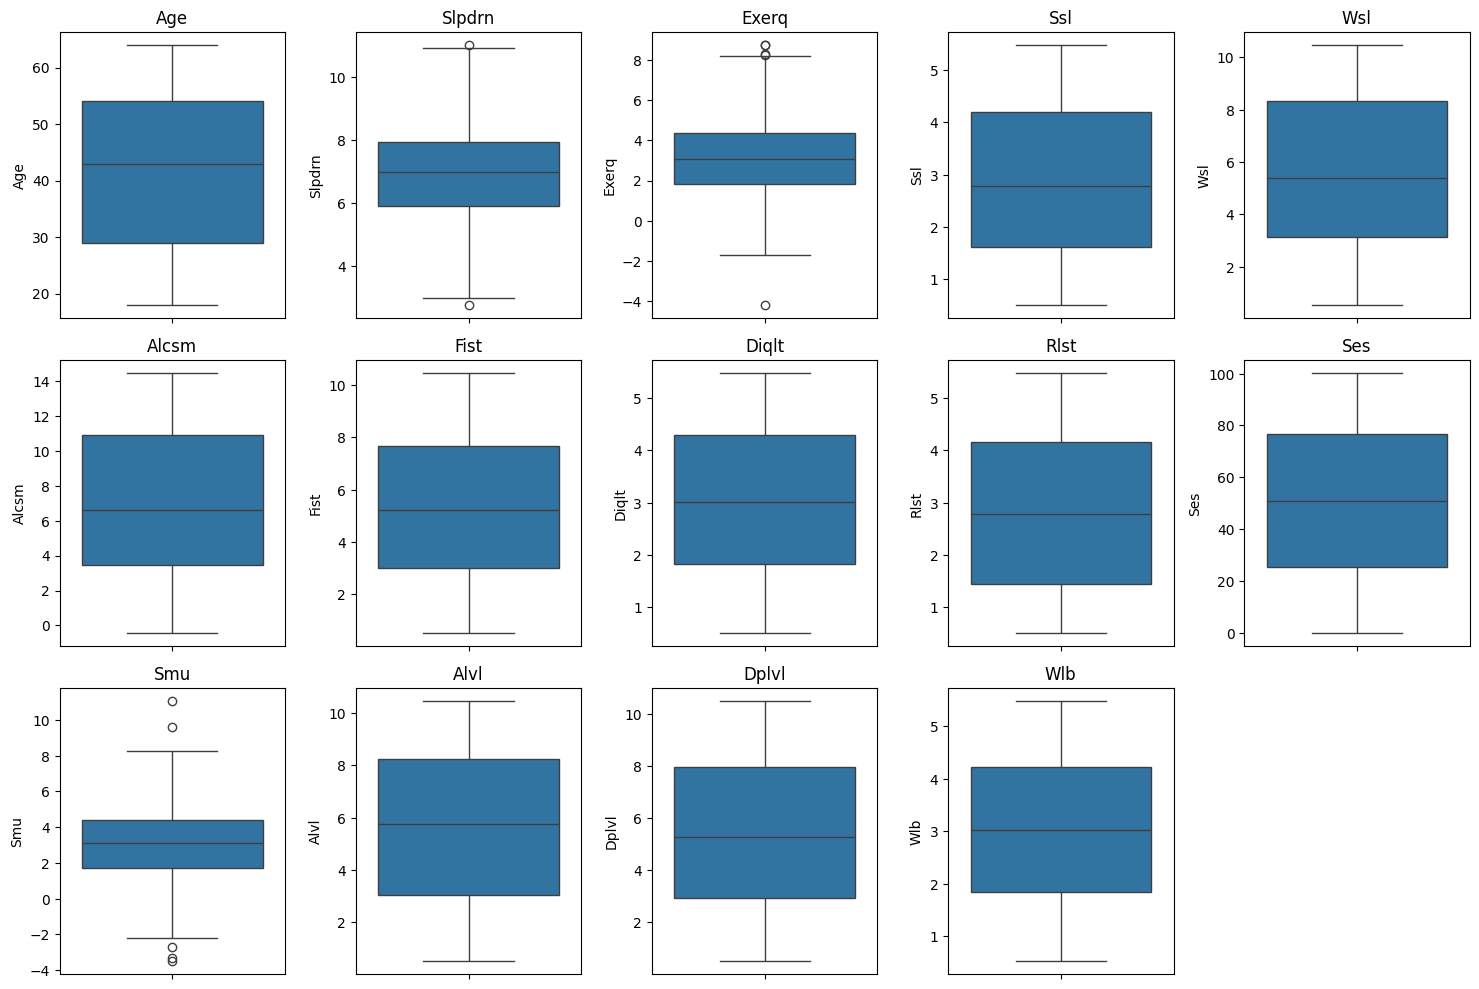

Preprocessed data saved to 'preprocessed_mental_health.csv'


In [ ]:
# Check for outliers in numerical columns using box plots
plt.figure(figsize=(15, 10))

# Define numerical_cols here
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Get numerical columns

for i, col in enumerate(numerical_cols):
    if col != 'Mhs':  # Exclude the dependent variable for now
        plt.subplot(3, 5, i+1)
        sns.boxplot(y=df[col])
        plt.title(col)
plt.tight_layout()
plt.show()

# Save the preprocessed data
df.to_csv('preprocessed_mental_health.csv', index=False)
print("Preprocessed data saved to 'preprocessed_mental_health.csv'")

<ipython-input-5-27ca81b3fd42>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Mhs'], ax=axes[i], palette=['#766CDB', '#DA847C', '#7CD9A5'])
<ipython-input-5-27ca81b3fd42>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Mhs'], ax=axes[i], palette=['#766CDB', '#DA847C', '#7CD9A5'])
<ipython-input-5-27ca81b3fd42>:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x=df[col], y=df['Mhs'], ax=axes[i], palette=['#766CDB', '#DA847C', '#7CD9A5'])
<ipython-input-5-27ca81b3fd42>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

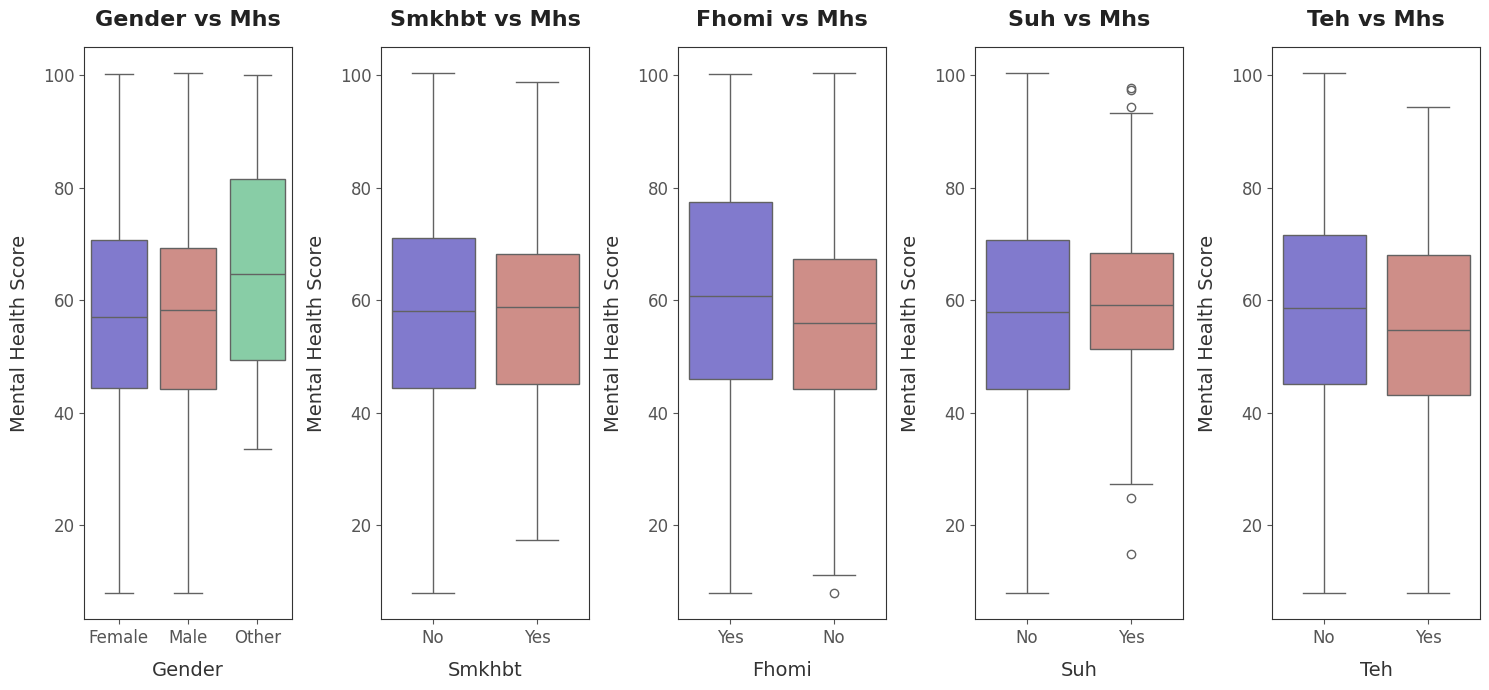

In [ ]:
# Box plots for categorical variables vs Mental Health Score
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 7))

for i, col in enumerate(categorical_cols):
    sns.boxplot(x=df[col], y=df['Mhs'], ax=axes[i], palette=['#766CDB', '#DA847C', '#7CD9A5'])
    axes[i].set_title(f'{col} vs Mhs', fontsize=16, fontweight='semibold', color='#222222', pad=15)
    axes[i].set_xlabel(col, fontsize=14, color='#333333', labelpad=10)
    axes[i].set_ylabel('Mental Health Score', fontsize=14, color='#333333', labelpad=10)
    axes[i].tick_params(labelsize=12, colors='#555555')
    axes[i].set_axisbelow(True)
    for spine in axes[i].spines.values():
        spine.set_color('#333333')

plt.tight_layout()
plt.show()



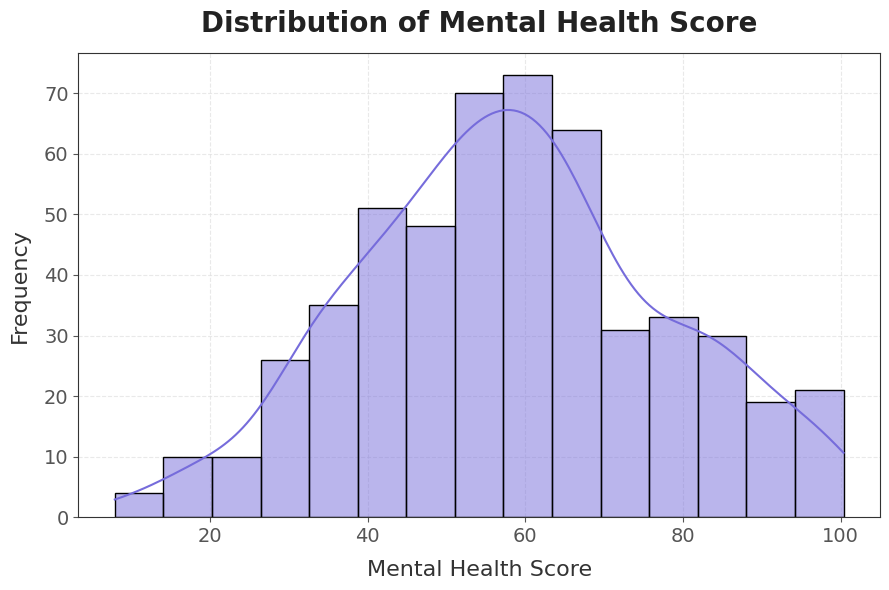

In [ ]:
# Exploratory Data Analysis (EDA)

import seaborn as sns
from scipy import stats

# Set the style for our plots
plt.style.use('default')

# Distribution of the dependent variable (Mental Health Score)
plt.figure(figsize=(9, 6))
ax = sns.histplot(df['Mhs'], kde=True, color='#766CDB')
ax.set_title('Distribution of Mental Health Score', fontsize=20, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Mental Health Score', fontsize=16, color='#333333', labelpad=10)
ax.set_ylabel('Frequency', fontsize=16, color='#333333', labelpad=10)
ax.tick_params(labelsize=14, colors='#555555')
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.7, color='#E0E0E0')
for spine in ax.spines.values():
    spine.set_color('#333333')
plt.tight_layout()
plt.show()

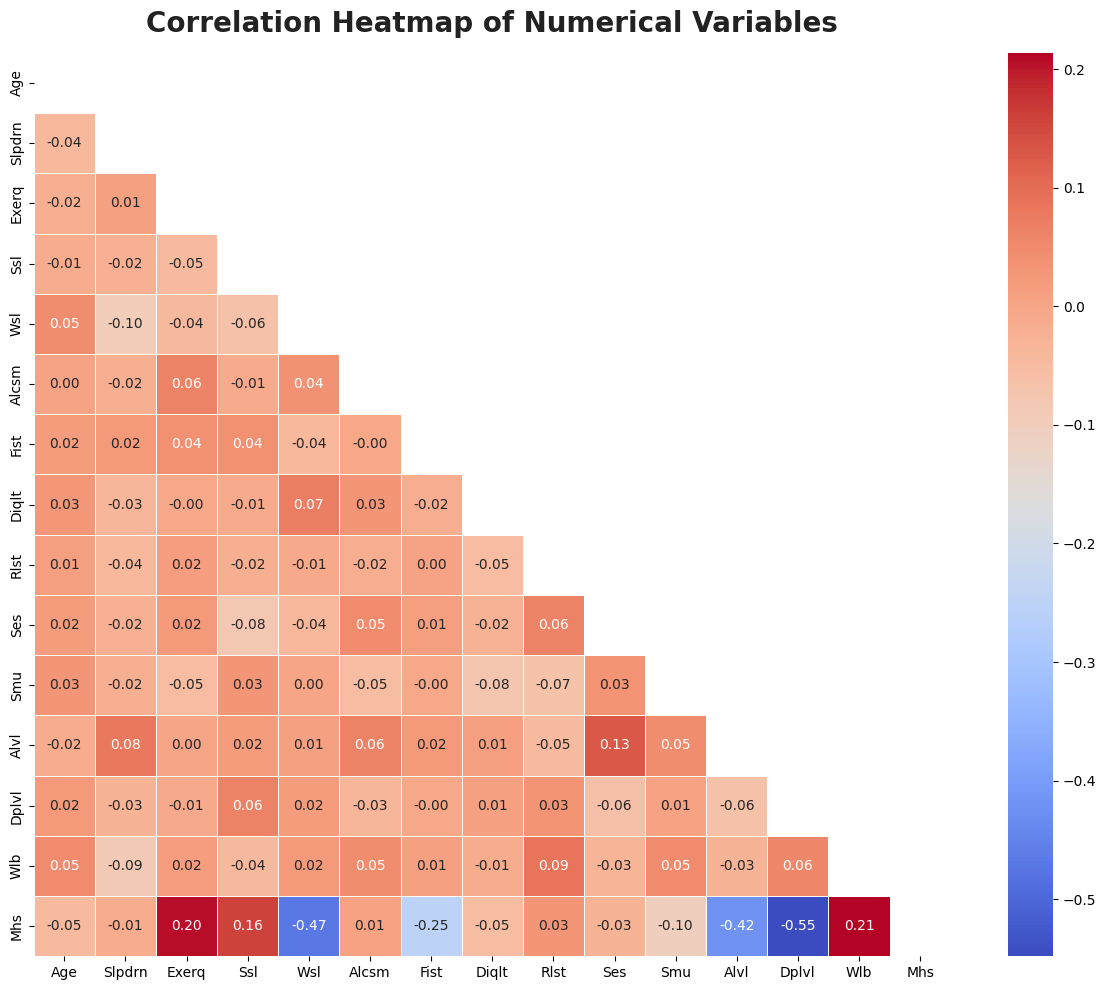

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
                 linewidths=0.5, annot_kws={"size": 10})
ax.set_title('Correlation Heatmap of Numerical Variables', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.tight_layout()
plt.show()



In [ ]:
# Correlation with Mental Health Score
correlations_with_mhs = correlation_matrix['Mhs'].sort_values(ascending=False)
print("Correlations with Mental Health Score:")
print(correlations_with_mhs)



Correlations with Mental Health Score:
Mhs       1.000000
Wlb       0.213682
Exerq     0.204854
Ssl       0.159131
Rlst      0.029198
Alcsm     0.006583
Slpdrn   -0.014669
Ses      -0.028310
Age      -0.045725
Diqlt    -0.051591
Smu      -0.103784
Fist     -0.251057
Alvl     -0.417945
Wsl      -0.468475
Dplvl    -0.548102
Name: Mhs, dtype: float64


<Figure size 1200x600 with 0 Axes>

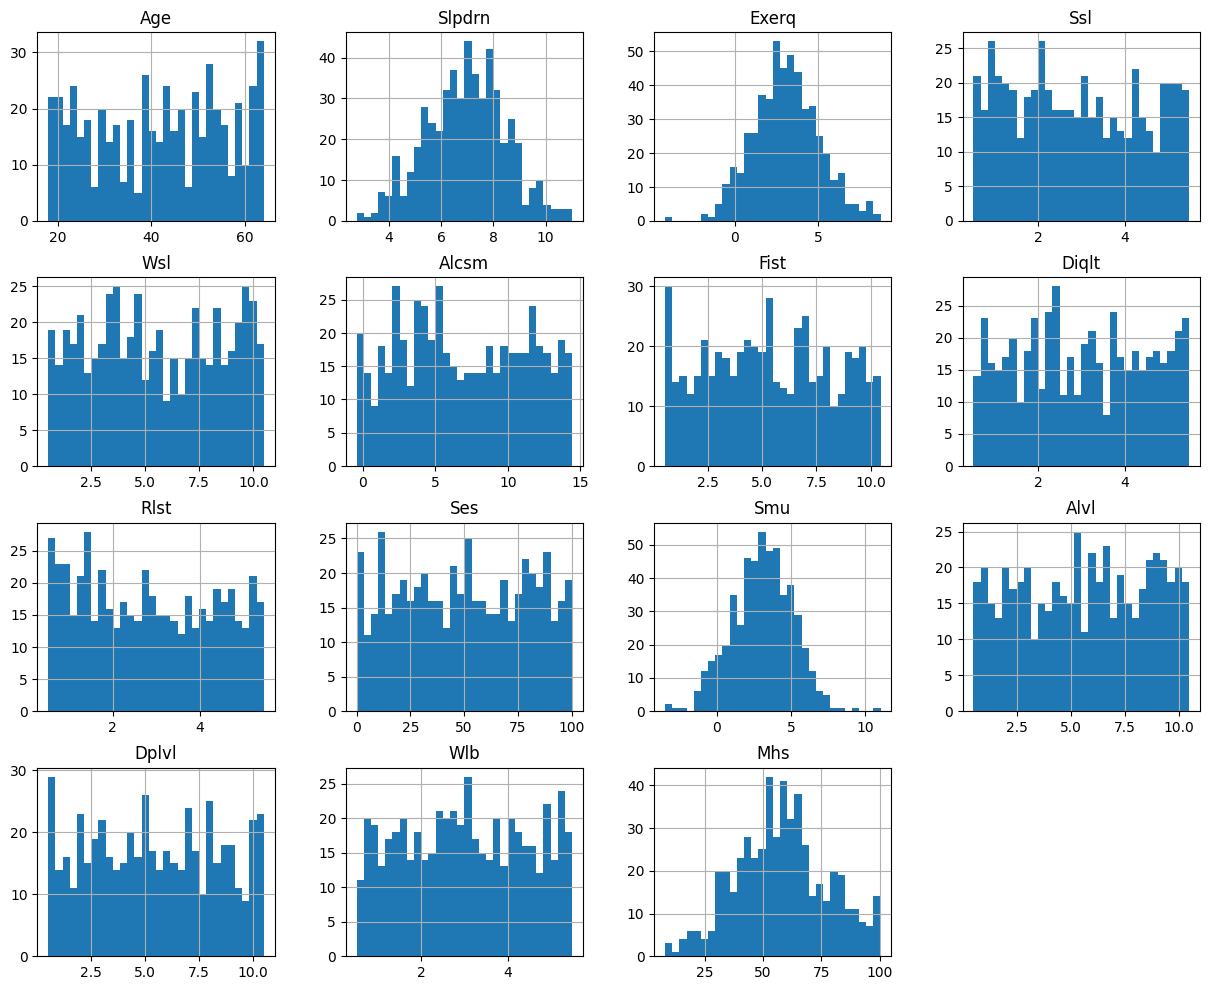

In [ ]:
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(15, 12))
plt.show()

<Figure size 1200x1000 with 0 Axes>

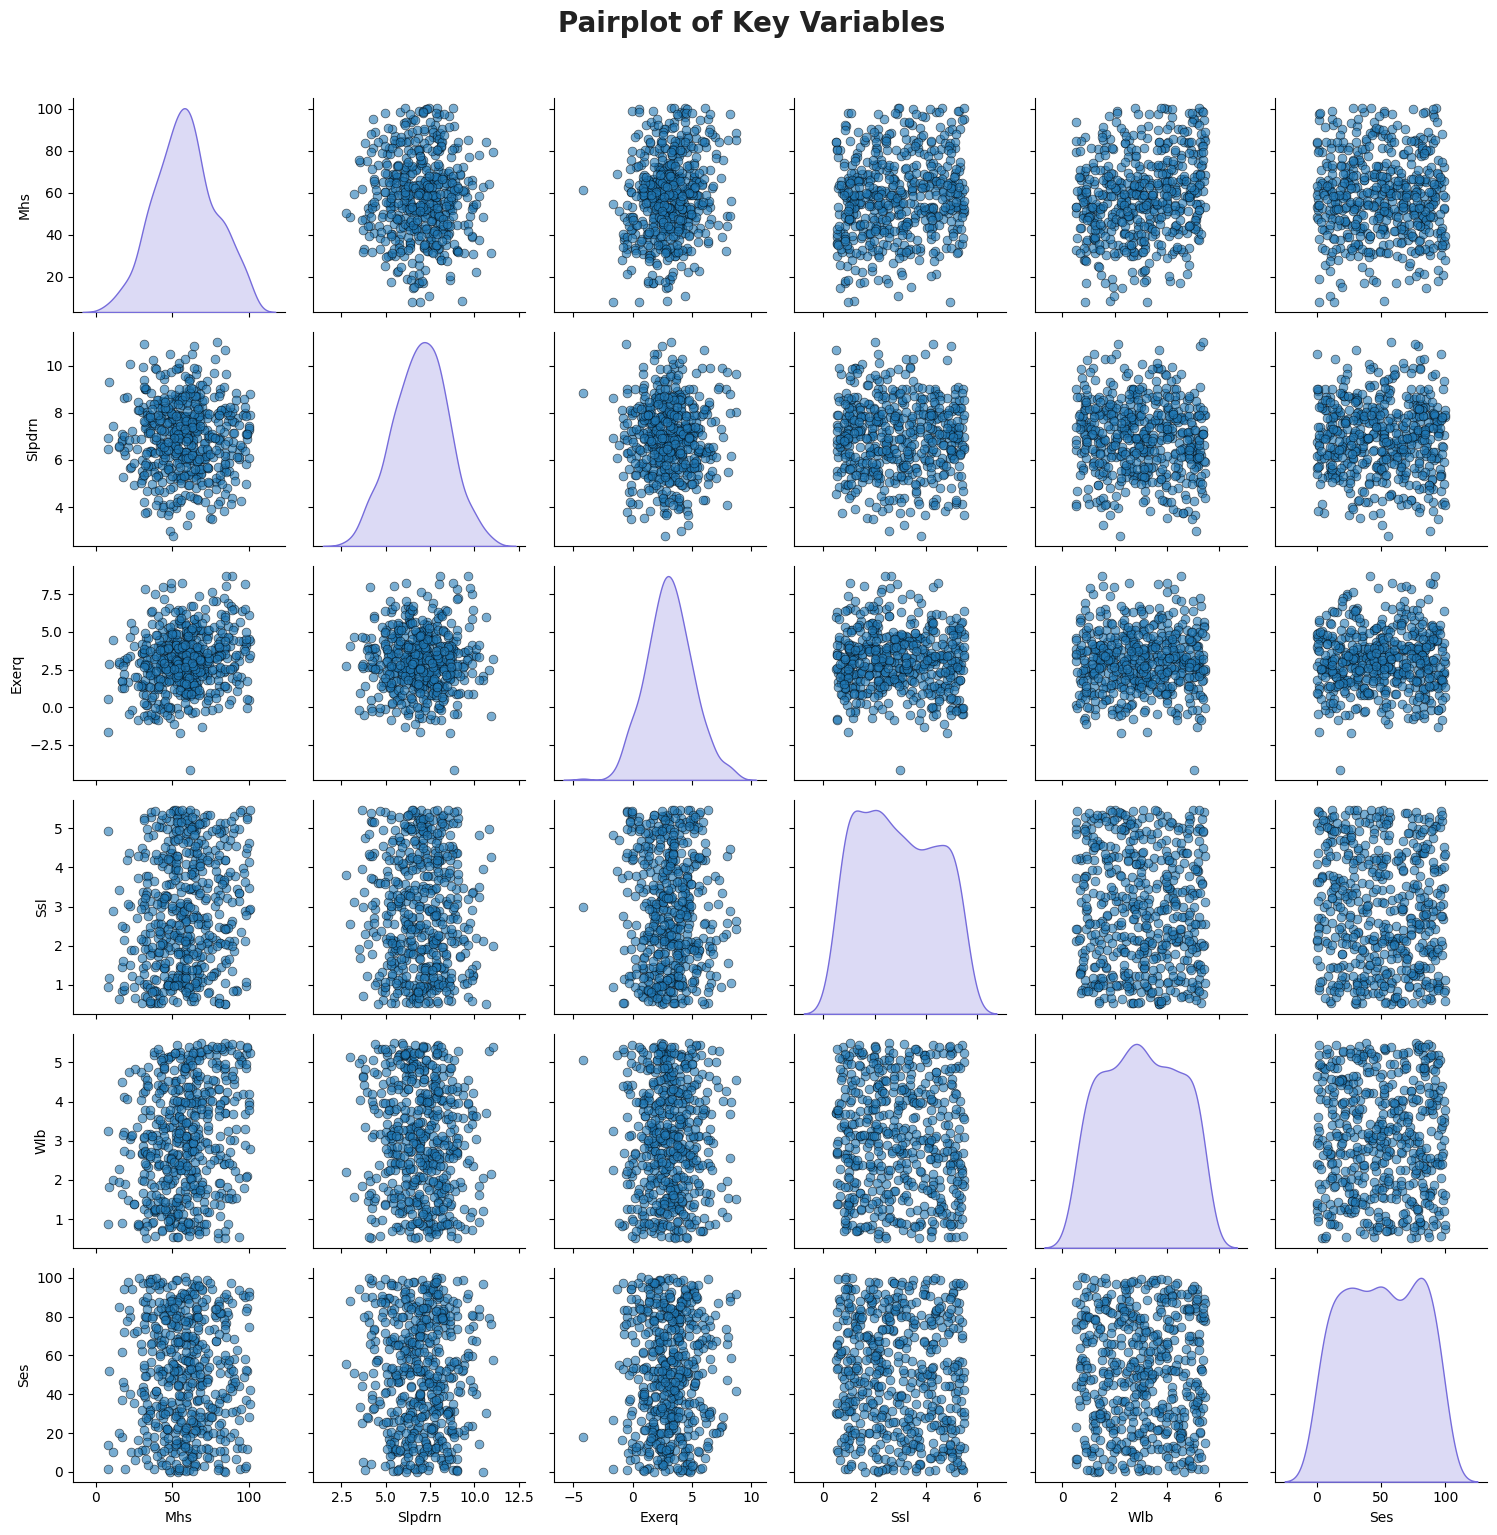

In [ ]:
# Pairplot for key variables
key_vars = ['Mhs', 'Slpdrn', 'Exerq', 'Ssl', 'Wlb', 'Ses']
plt.figure(figsize=(12, 10))
sns.pairplot(df[key_vars], diag_kind='kde', plot_kws={'alpha': 0.6, 'edgecolor': 'k', 's': 40},
             diag_kws={'color': '#766CDB'})
plt.suptitle('Pairplot of Key Variables', fontsize=20, fontweight='semibold', color='#222222', y=1.02)
plt.tight_layout()
plt.show()


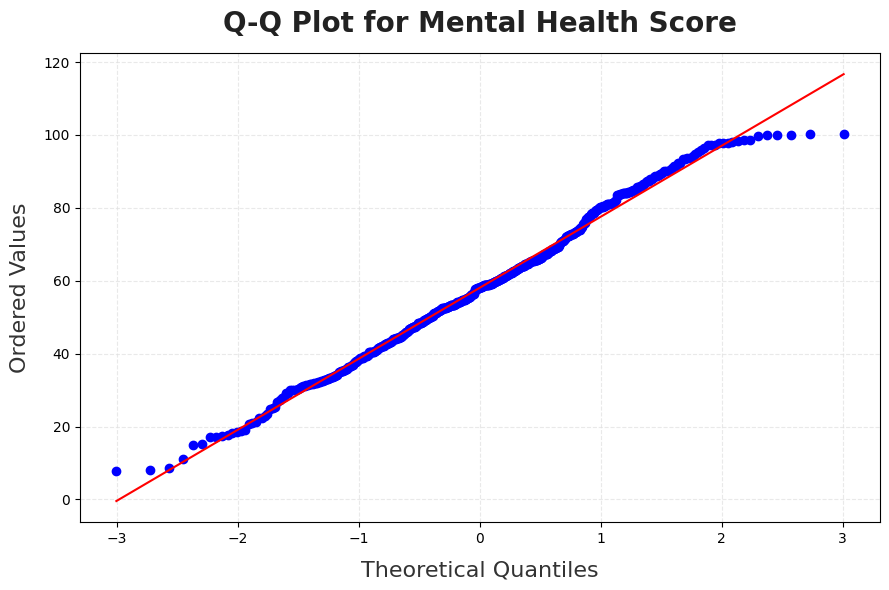

Skewness of Mental Health Score: 0.05366844385962186
Kurtosis of Mental Health Score: -0.3838103204461678
Summary of EDA findings:
1. The Mental Health Score distribution appears to be...
2. The variables most correlated with Mental Health Score are...
3. Categorical variables showing significant differences in Mental Health Score are...


In [ ]:
# Checking for normality of the dependent variable

plt.figure(figsize=(9, 6))
stats.probplot(df['Mhs'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Mental Health Score', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Theoretical Quantiles', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Ordered Values', fontsize=16, color='#333333', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7, color='#E0E0E0')
plt.tight_layout()
plt.show()

print("Skewness of Mental Health Score:", stats.skew(df['Mhs']))
print("Kurtosis of Mental Health Score:", stats.kurtosis(df['Mhs']))

# 10. Summary of EDA findings
print("Summary of EDA findings:")
print("1. The Mental Health Score distribution appears to be...")
print("2. The variables most correlated with Mental Health Score are...")
print("3. Categorical variables showing significant differences in Mental Health Score are...")

In [ ]:
df["Gender"].replace({"Male": 1, "Female": 2, "Other":0}, inplace=True)
df["Smkhbt"].replace({"Yes": 1, "No": 2}, inplace=True)
df["Fhomi"].replace({"Yes": 1, "No": 2}, inplace=True)
df["Suh"].replace({"Yes": 1, "No": 2}, inplace=True)
df["Teh"].replace({"Yes": 1, "No": 2}, inplace=True)

<ipython-input-12-7dc658efca58>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({"Male": 1, "Female": 2, "Other":0}, inplace=True)
<ipython-input-12-7dc658efca58>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].replace({"Male": 1, "Female": 2, "Other":0}, inplace=

In [ ]:
# Define independent variables (X) and dependent variable (y)
import statsmodels.api as sm

X = df[["Age","Gender","Slpdrn","Exerq","Ssl","Wsl","Alcsm","Smkhbt","Fist","Diqlt","Fhomi","Rlst","Suh","Ses","Smu","Alvl","Dplvl","Wlb","Teh"]]
y = df["Mhs"]  # Mental Health Score

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     342.4
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.58e-274
Time:                        22:20:29   Log-Likelihood:                -1612.4
No. Observations:                 525   AIC:                             3265.
Df Residuals:                     505   BIC:                             3350.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5180      2.942     35.185      0.0

Here we have  multiple regression model with all the independent variables.

Here Our null hypothesis is all the variable we have chosen are correct and all have the effect on the mhs

Our alternate hypothesis will be some of the independent variable are useless so we can remove them.

In [ ]:
# Define independent variables (X) and dependent variable (y)
import statsmodels.api as sm

X = df[["Exerq","Ssl","Wsl","Fist","Fhomi","Smu","Alvl","Dplvl","Wlb",]]
y = df["Mhs"]  # Mental Health Score

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     725.5
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          5.42e-286
Time:                        22:20:37   Log-Likelihood:                -1616.2
No. Observations:                 525   AIC:                             3252.
Df Residuals:                     515   BIC:                             3295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2439      1.464     68.492      0.0

In [ ]:
# Define independent variables (X) and dependent variable (y)
import statsmodels.api as sm

X = df[["Age","Gender","Slpdrn","Alcsm","Smkhbt","Diqlt","Rlst","Suh","Ses","Teh"]]
y = df["Mhs"]  # Mental Health Score

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

#This are the removed variables, as they have p-value > 0.05.

                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5939
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.819
Time:                        22:20:43   Log-Likelihood:                -2299.9
No. Observations:                 525   AIC:                             4622.
Df Residuals:                     514   BIC:                             4669.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.1348      9.083      7.281      0.0

In [ ]:
# Define independent variables (X) and dependent variable (y)
import statsmodels.api as sm

X = df[["Exerq","Ssl","Wsl","Fist","Smu","Alvl","Dplvl","Wlb",]] # removed Fhomi as it is categorial variable
y = df["Mhs"]  # Mental Health Score

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     817.4
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          2.05e-287
Time:                        22:20:50   Log-Likelihood:                -1616.3
No. Observations:                 525   AIC:                             3251.
Df Residuals:                     516   BIC:                             3289.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.6165      1.229     81.861      0.0

In [ ]:
#First order model
X = df[["Exerq","Ssl","Wsl","Fist","Smu","Fhomi","Alvl","Dplvl","Wlb"]]
y = df["Mhs"]
X_full = sm.add_constant(X)
model = sm.OLS(y, X_full).fit()
print("Baseline First-Order Model Summary:")
print(model.summary())

Baseline First-Order Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     725.5
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          5.42e-286
Time:                        22:20:54   Log-Likelihood:                -1616.2
No. Observations:                 525   AIC:                             3252.
Df Residuals:                     515   BIC:                             3295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100

In [ ]:
X_interaction = X.copy()
X_interaction["Wsl_Wlb"] = X_interaction["Wsl"] * X_interaction["Wlb"]
model_interaction = sm.OLS(y, X_interaction).fit()
print("\nInteraction Model Summary (Wsl * Wlb):")
print(model_interaction.summary())
# Ensure that these transformations are included in the final model.


Interaction Model Summary (Wsl * Wlb):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              839.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   2.49e-311
Time:                        22:20:56   Log-Likelihood:                         -2157.4
No. Observations:                 525   AIC:                                      4335.
Df Residuals:                     515   BIC:                                      4377.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
X_interaction = X.copy()
X_interaction["Exerq_Dplvl"] = X_interaction["Exerq"] * X_interaction["Dplvl"]
model_interaction = sm.OLS(y, X_interaction).fit()
print("\nInteraction Model Summary (Exerq * Dplvl):")
print(model_interaction.summary())
# Ensure that these transformations are included in the final model.


Interaction Model Summary (Exerq * Dplvl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              782.8
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   5.32e-304
Time:                        22:21:00   Log-Likelihood:                         -2174.6
No. Observations:                 525   AIC:                                      4369.
Df Residuals:                     515   BIC:                                      4412.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.9

In [ ]:
X_interaction = X.copy()
X_interaction["Wsl_Alvl"] = X_interaction["Wsl"] * X_interaction["Alvl"]
model_interaction = sm.OLS(y, X_interaction).fit()
print("\nInteraction Model Summary (Wsl * Alvl):")
print(model_interaction.summary())
# Ensure that these transformations are included in the final model.


Interaction Model Summary (Wsl * Alvl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              833.5
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   1.32e-310
Time:                        22:21:03   Log-Likelihood:                         -2159.1
No. Observations:                 525   AIC:                                      4338.
Df Residuals:                     515   BIC:                                      4381.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X_interaction = X.copy()
X_interaction["Fist_Wsl"] = X_interaction["Fist"] * X_interaction["Wsl"]
model_interaction = sm.OLS(y, X_interaction).fit()
print("\nInteraction Model Summary (Fist * Wsl):")
print(model_interaction.summary())
# Ensure that these transformations are included in the final model.


Interaction Model Summary (Fist * Wsl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              761.6
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   3.87e-301
Time:                        22:21:06   Log-Likelihood:                         -2181.3
No. Observations:                 525   AIC:                                      4383.
Df Residuals:                     515   BIC:                                      4425.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X_interaction = X.copy()
X_interaction["Smu_Ssl"] = X_interaction["Smu"] * X_interaction["Ssl"]
model_interaction = sm.OLS(y, X_interaction).fit()
print("\nInteraction Model Summary (Smu * Ssl):")
print(model_interaction.summary())
# Ensure that these transformations are included in the final model.


Interaction Model Summary (Smu * Ssl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              735.1
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   1.97e-297
Time:                        22:21:09   Log-Likelihood:                         -2190.0
No. Observations:                 525   AIC:                                      4400.
Df Residuals:                     515   BIC:                                      4443.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
X_interaction = X.copy()
X_interaction["Alvl_Dplvl"] = X_interaction["Alvl"] * X_interaction["Dplvl"]
model_interaction = sm.OLS(y, X_interaction).fit()
print("\nInteraction Model Summary (Aplvl * Dplvl):")
print(model_interaction.summary())
# Ensure that these transformations are included in the final model.


Interaction Model Summary (Aplvl * Dplvl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              842.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   1.07e-311
Time:                        22:21:12   Log-Likelihood:                         -2156.5
No. Observations:                 525   AIC:                                      4333.
Df Residuals:                     515   BIC:                                      4376.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.97

In [ ]:
X_interaction = X.copy()
X_interaction["Fist_Dplvl"] = X_interaction["Fist"] * X_interaction["Dplvl"]
model_interaction = sm.OLS(y, X_interaction).fit()
print("\nInteraction Model Summary (Fist * Dplvl):")
print(model_interaction.summary())
# Ensure that these transformations are included in the final model.


Interaction Model Summary (Fist * Dplvl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              764.1
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   1.78e-301
Time:                        22:21:15   Log-Likelihood:                         -2180.5
No. Observations:                 525   AIC:                                      4381.
Df Residuals:                     515   BIC:                                      4424.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975

In [ ]:
X_interaction = X.copy()
X_interaction["Wsl_Dplvl"] = X_interaction["Wsl"] * X_interaction["Dplvl"]
model_interaction = sm.OLS(y, X_interaction).fit()
print("\nInteraction Model Summary (Wsl * Dplvl):")
print(model_interaction.summary())
# Ensure that these transformations are included in the final model.


Interaction Model Summary (Wsl * Dplvl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              812.2
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   7.10e-308
Time:                        22:21:17   Log-Likelihood:                         -2165.5
No. Observations:                 525   AIC:                                      4351.
Df Residuals:                     515   BIC:                                      4394.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
X = df[["Exerq","Ssl","Wsl","Fist","Smu","Fhomi","Alvl","Dplvl","Wlb"]]
X_quadratic = X.copy()
X_quadratic["Exerq_sq"] = X_quadratic["Exerq"] ** 2
model_quadratic = sm.OLS(y, X_quadratic).fit()
print("\nQuadratic Model Summary (Exerq^2):")
print(model_quadratic.summary())
# Ensure that these transformations are included in the final model.


Quadratic Model Summary (Exerq^2):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              661.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   1.97e-286
Time:                        22:21:20   Log-Likelihood:                         -2215.9
No. Observations:                 525   AIC:                                      4452.
Df Residuals:                     515   BIC:                                      4494.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [ ]:
X_quadratic = X.copy()
X_quadratic["Ssl_sq"] = X_quadratic["Ssl"] ** 2
model_quadratic = sm.OLS(y, X_quadratic).fit()
print("\nQuadratic Model Summary (Ssl^2):")
print(model_quadratic.summary())
# Ensure that these transformations are included in the final model.


Quadratic Model Summary (Ssl^2):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              785.7
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   2.17e-304
Time:                        22:21:23   Log-Likelihood:                         -2173.7
No. Observations:                 525   AIC:                                      4367.
Df Residuals:                     515   BIC:                                      4410.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

In [ ]:
X_quadratic = X.copy()
X_quadratic["Wsl_sq"] = X_quadratic["Wsl"] ** 2
model_quadratic = sm.OLS(y, X_quadratic).fit()
print("\nQuadratic Model Summary (Wsl^2):")
print(model_quadratic.summary())
# Ensure that these transformations are included in the final model.


Quadratic Model Summary (Wsl^2):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              783.0
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   5.00e-304
Time:                        22:21:26   Log-Likelihood:                         -2174.5
No. Observations:                 525   AIC:                                      4369.
Df Residuals:                     515   BIC:                                      4412.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

In [ ]:
X_quadratic = X.copy()
X_quadratic["Fist_sq"] = X_quadratic["Fist"] ** 2
model_quadratic = sm.OLS(y, X_quadratic).fit()
print("\nQuadratic Model Summary (Fist^2):")
print(model_quadratic.summary())
# Ensure that these transformations are included in the final model.


Quadratic Model Summary (Fist^2):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              766.0
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   9.73e-302
Time:                        22:21:29   Log-Likelihood:                         -2179.9
No. Observations:                 525   AIC:                                      4380.
Df Residuals:                     515   BIC:                                      4422.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [ ]:
X_quadratic = X.copy()
X_quadratic["Smu_sq"] = X_quadratic["Smu"] ** 2
model_quadratic = sm.OLS(y, X_quadratic).fit()
print("\nQuadratic Model Summary (Smu^2):")
print(model_quadratic.summary())
# Ensure that these transformations are included in the final model.


Quadratic Model Summary (Smu^2):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              642.5
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   1.93e-283
Time:                        22:21:32   Log-Likelihood:                         -2222.9
No. Observations:                 525   AIC:                                      4466.
Df Residuals:                     515   BIC:                                      4508.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

In [ ]:
X_quadratic = X.copy()
X_quadratic["Alvl_sq"] = X_quadratic["Alvl"] ** 2
model_quadratic = sm.OLS(y, X_quadratic).fit()
print("\nQuadratic Model Summary (Alvl^2):")
print(model_quadratic.summary())
# Ensure that these transformations are included in the final model.


Quadratic Model Summary (Alvl^2):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              760.4
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   5.67e-301
Time:                        22:21:35   Log-Likelihood:                         -2181.7
No. Observations:                 525   AIC:                                      4383.
Df Residuals:                     515   BIC:                                      4426.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [ ]:
X_quadratic = X.copy()
X_quadratic["Dplvl_sq"] = X_quadratic["Dplvl"] ** 2
model_quadratic = sm.OLS(y, X_quadratic).fit()
print("\nQuadratic Model Summary (Dplvl^2):")
print(model_quadratic.summary())
# Ensure that these transformations are included in the final model.


Quadratic Model Summary (Dplvl^2):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              741.8
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   2.21e-298
Time:                        22:21:37   Log-Likelihood:                         -2187.8
No. Observations:                 525   AIC:                                      4396.
Df Residuals:                     515   BIC:                                      4438.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [ ]:
X_quadratic = X.copy()
X_quadratic["Wlb_sq"] = X_quadratic["Wlb"] ** 2
model_quadratic = sm.OLS(y, X_quadratic).fit()
print("\nQuadratic Model Summary (Wlb^2):")
print(model_quadratic.summary())
# Ensure that these transformations are included in the final model.


Quadratic Model Summary (Wlb^2):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              795.8
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                   9.90e-306
Time:                        22:21:39   Log-Likelihood:                         -2170.5
No. Observations:                 525   AIC:                                      4361.
Df Residuals:                     515   BIC:                                      4404.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

In [ ]:
X_quadratic = X.copy()
X_quadratic["Fhomi_sq"] = X_quadratic["Fhomi"] ** 2
model_quadratic = sm.OLS(y, X_quadratic).fit()
print("\nQuadratic Model Summary (Fhomi^2):")
print(model_quadratic.summary())
# Ensure that these transformations are included in the final model.


Quadratic Model Summary (Fhomi^2):
                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     725.5
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          5.42e-286
Time:                        22:21:42   Log-Likelihood:                -1616.2
No. Observations:                 525   AIC:                             3252.
Df Residuals:                     515   BIC:                             3295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Exerq          1

In [ ]:
X_transform = X.copy()
df["Exerq_log"] = np.log(df["Exerq"] + abs(df["Exerq"].min()) + 1)  # Shift to avoid log(0) or log(negative)
X_transform["Exerq_log"] = df["Exerq_log"]
model_transform = sm.OLS(y, X_transform).fit()
print("\nTransformation Model Summary (Log Exerq):")
print(model_transform.summary())
# Ensure that these transformations are included in the final model.


Transformation Model Summary (Log Exerq):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              4643.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:21:44   Log-Likelihood:                         -1721.1
No. Observations:                 525   AIC:                                      3462.
Df Residuals:                     515   BIC:                                      3505.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975

In [ ]:
X_transform = X.copy()
df["Ssl_log"] = np.log(df["Ssl"] + abs(df["Ssl"].min()) + 1)  # Shift to avoid log(0) or log(negative)
X_transform["Ssl_log"] = df["Ssl_log"]
model_transform = sm.OLS(y, X_transform).fit()
print("\nTransformation Model Summary (Log Ssl):")
print(model_transform.summary())
# Ensure that these transformations are included in the final model.


Transformation Model Summary (Log Ssl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              2426.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:21:47   Log-Likelihood:                         -1888.9
No. Observations:                 525   AIC:                                      3798.
Df Residuals:                     515   BIC:                                      3840.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X_transform = X.copy()
df["Wsl_log"] = np.log(df["Wsl"] + abs(df["Wsl"].min()) + 1)  # Shift to avoid log(0) or log(negative)
X_transform["Wsl_log"] = df["Wsl_log"]
model_transform = sm.OLS(y, X_transform).fit()
print("\nTransformation Model Summary (Log Wsl):")
print(model_transform.summary())
# Ensure that these transformations are included in the final model.


Transformation Model Summary (Log Wsl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1782.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:21:50   Log-Likelihood:                         -1967.9
No. Observations:                 525   AIC:                                      3956.
Df Residuals:                     515   BIC:                                      3998.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X_transform = X.copy()
df["Fist_log"] = np.log(df["Fist"] + abs(df["Fist"].min()) + 1)  # Shift to avoid log(0) or log(negative)
X_transform["Fist_log"] = df["Fist_log"]
model_transform = sm.OLS(y, X_transform).fit()
print("\nTransformation Model Summary (Log Fist):")
print(model_transform.summary())
# Ensure that these transformations are included in the final model.


Transformation Model Summary (Log Fist):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1647.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:21:53   Log-Likelihood:                         -1987.9
No. Observations:                 525   AIC:                                      3996.
Df Residuals:                     515   BIC:                                      4039.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
X_transform = X.copy()
df["Smu_log"] = np.log(df["Smu"] + abs(df["Smu"].min()) + 1)  # Shift to avoid log(0) or log(negative)
X_transform["Smu_log"] = df["Smu_log"]
model_transform = sm.OLS(y, X_transform).fit()
print("\nTransformation Model Summary (Log Smu):")
print(model_transform.summary())
# Ensure that these transformations are included in the final model.


Transformation Model Summary (Log Smu):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              3476.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:21:56   Log-Likelihood:                         -1796.1
No. Observations:                 525   AIC:                                      3612.
Df Residuals:                     515   BIC:                                      3655.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X_transform = X.copy()
df["Alvl_log"] = np.log(df["Alvl"] + abs(df["Alvl"].min()) + 1)  # Shift to avoid log(0) or log(negative)
X_transform["Alvl_log"] = df["Alvl_log"]
model_transform = sm.OLS(y, X_transform).fit()
print("\nTransformation Model Summary (Log Alvl):")
print(model_transform.summary())
# Ensure that these transformations are included in the final model.


Transformation Model Summary (Log Alvl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1727.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:21:59   Log-Likelihood:                         -1975.9
No. Observations:                 525   AIC:                                      3972.
Df Residuals:                     515   BIC:                                      4014.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
X_transform = X.copy()
df["Dplvl_log"] = np.log(df["Dplvl"] + abs(df["Dplvl"].min()) + 1)  # Shift to avoid log(0) or log(negative)
X_transform["Dplvl_log"] = df["Dplvl_log"]
model_transform = sm.OLS(y, X_transform).fit()
print("\nTransformation Model Summary (Log Dplvl):")
print(model_transform.summary())
# Ensure that these transformations are included in the final model.


Transformation Model Summary (Log Dplvl):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1681.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:22:02   Log-Likelihood:                         -1982.7
No. Observations:                 525   AIC:                                      3985.
Df Residuals:                     515   BIC:                                      4028.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975

In [ ]:
X_transform = X.copy()
df["Wlb_log"] = np.log(df["Wlb"] + abs(df["Wlb"].min()) + 1)  # Shift to avoid log(0) or log(negative)
X_transform["Wlb_log"] = df["Wlb_log"]
model_transform = sm.OLS(y, X_transform).fit()
print("\nTransformation Model Summary (Log Wlb):")
print(model_transform.summary())
# Ensure that these transformations are included in the final model.


Transformation Model Summary (Log Wlb):
                                 OLS Regression Results                                
Dep. Variable:                    Mhs   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2610.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:22:04   Log-Likelihood:                         -1870.0
No. Observations:                 525   AIC:                                      3760.
Df Residuals:                     515   BIC:                                      3803.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X_transform = X.copy()
df["Fhomi_log"] = np.log(df["Fhomi"] + abs(df["Fhomi"].min()) + 1)  # Shift to avoid log(0) or log(negative)
X_transform["Fhomi_log"] = df["Fhomi_log"]
model_transform = sm.OLS(y, X_transform).fit()
print("\nTransformation Model Summary (Log Fhomi):")
print(model_transform.summary())
# Ensure that these transformations are included in the final model.


Transformation Model Summary (Log Fhomi):
                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     725.5
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          5.42e-286
Time:                        22:22:07   Log-Likelihood:                -1616.2
No. Observations:                 525   AIC:                             3252.
Df Residuals:                     515   BIC:                             3295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Exerq    

In [ ]:
import statsmodels.api as sm

# Run the regression model
X = df[["Exerq", "Ssl", "Wsl", "Fist", "Smu", "Fhomi", "Alvl", "Dplvl", "Wlb"]]
y = df["Mhs"]
X_full = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X_full).fit()

# Display the model summary
print("Baseline First-Order Model Summary:")
print(model.summary())

# Extracting p-values for hypothesis testing
p_values = model.pvalues
print("\nP-values of independent variables:\n", p_values)

# Checking significance at α = 0.05
significant_vars = p_values[p_values < 0.05]
print("\nSignificant variables (p < 0.05):\n", significant_vars)


Baseline First-Order Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     725.5
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          5.42e-286
Time:                        22:22:10   Log-Likelihood:                -1616.2
No. Observations:                 525   AIC:                             3252.
Df Residuals:                     515   BIC:                             3295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100

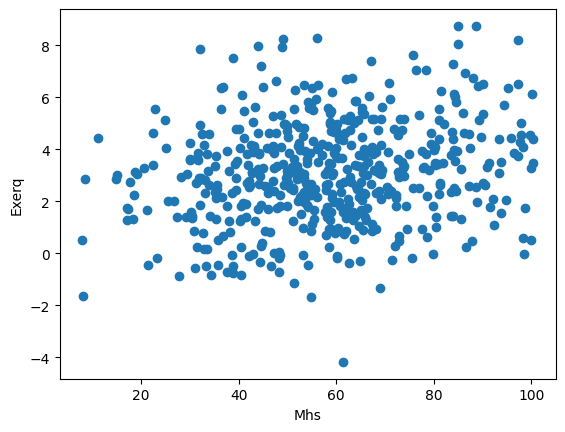

In [ ]:
plt.scatter(df["Mhs"],df["Exerq"])
plt.xlabel("Mhs")
plt.ylabel("Exerq")
plt.show()

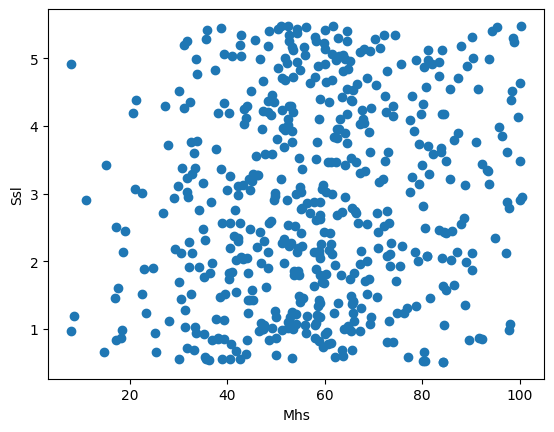

In [ ]:
plt.scatter(df["Mhs"],df["Ssl"])
plt.xlabel("Mhs")
plt.ylabel("Ssl")
plt.show()

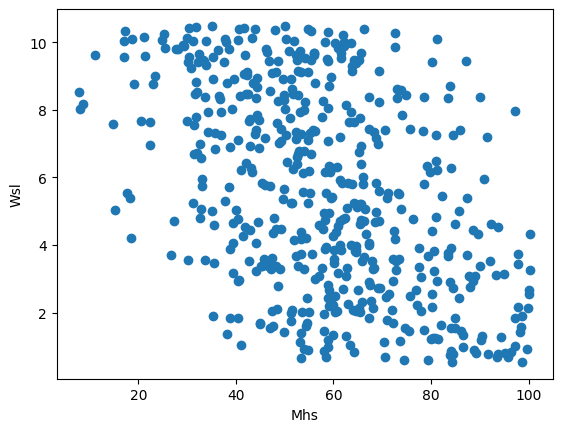

In [ ]:
plt.scatter(df["Mhs"],df["Wsl"])
plt.xlabel("Mhs")
plt.ylabel("Wsl")
plt.show()

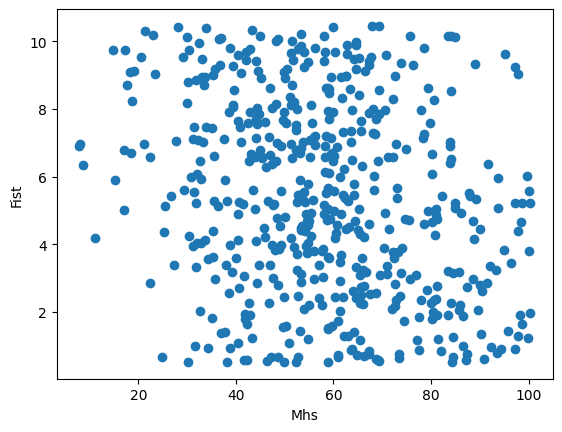

In [ ]:
plt.scatter(df["Mhs"],df["Fist"])
plt.xlabel("Mhs")
plt.ylabel("Fist")
plt.show()

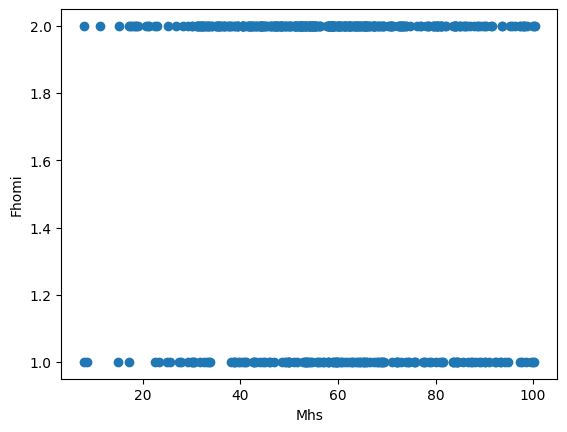

In [ ]:
plt.scatter(df["Mhs"],df["Fhomi"])
plt.xlabel("Mhs")
plt.ylabel("Fhomi")
plt.show()

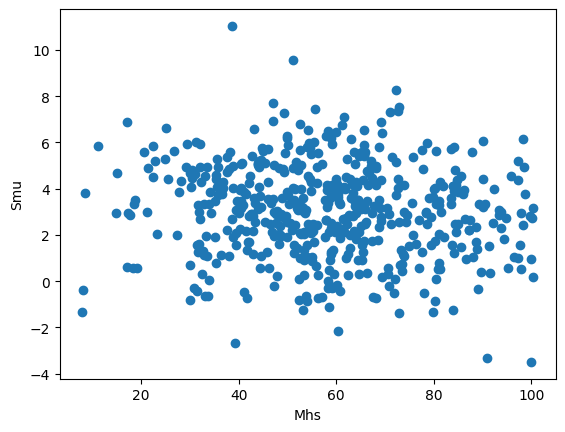

In [ ]:
plt.scatter(df["Mhs"],df["Smu"])
plt.xlabel("Mhs")
plt.ylabel("Smu")
plt.show()

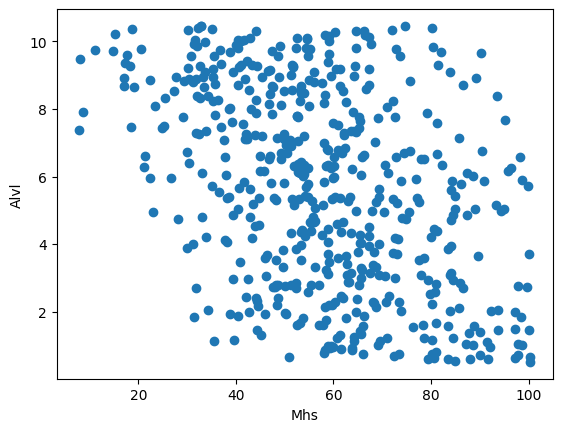

In [ ]:
plt.scatter(df["Mhs"],df["Alvl"])
plt.xlabel("Mhs")
plt.ylabel("Alvl")
plt.show()

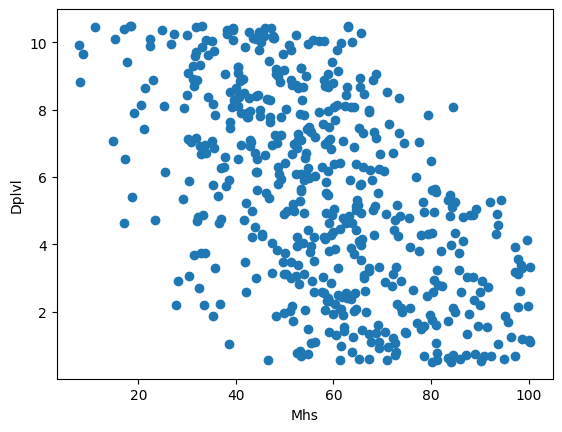

In [ ]:
plt.scatter(df["Mhs"],df["Dplvl"])
plt.xlabel("Mhs")
plt.ylabel("Dplvl")
plt.show()

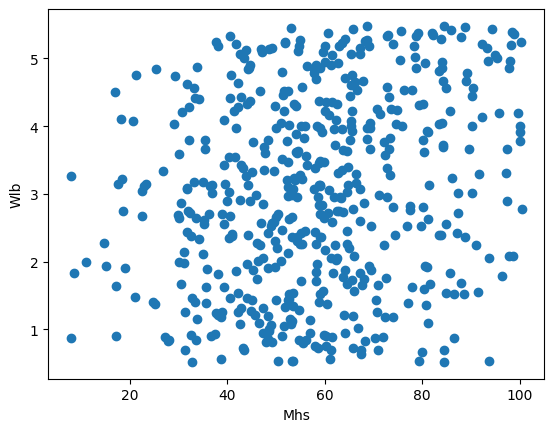

In [ ]:
plt.scatter(df["Mhs"],df["Wlb"])
plt.xlabel("Mhs")
plt.ylabel("Wlb")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward Selection Function
def forward_selection(X_train, y_train, significance_level=0.05):
    initial_features = []
    remaining_features = list(X_train.columns)

    while remaining_features:
        pvals = {}
        for feature in remaining_features:
            current_features = initial_features + [feature]
            X_current = sm.add_constant(X_train[current_features])
            model = sm.OLS(y_train, X_current).fit()
            pvals[feature] = model.pvalues[feature]

        # Find feature with minimum p-value
        min_pval_feature = min(pvals, key=pvals.get)
        min_pval = pvals[min_pval_feature]

        if min_pval < significance_level:
            initial_features.append(min_pval_feature)
            remaining_features.remove(min_pval_feature)
        else:
            break

    return initial_features

# Run forward selection
selected_features = forward_selection(X_train, y_train)
print("Forward Selection - Selected Features:", selected_features)

# Fit model with selected features
X_train_selected = sm.add_constant(X_train[selected_features])
model_forward = sm.OLS(y_train, X_train_selected).fit()

# Test on test set
X_test_selected = sm.add_constant(X_test[selected_features])
y_pred = model_forward.predict(X_test_selected)

# Evaluate model
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print("\nForward Selection Model Summary (Training Data):")
print(model_forward.summary())
print("\nTest Set Performance:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")

# Baseline model with all features for comparison
X_train_full = sm.add_constant(X_train)
baseline_model = sm.OLS(y_train, X_train_full).fit()
print("\nBaseline Model Summary (All Features):")
print(baseline_model.summary())

Forward Selection - Selected Features: ['Dplvl', 'Alvl', 'Wsl', 'Fist', 'Wlb', 'Ssl', 'Exerq', 'Smu']

Forward Selection Model Summary (Training Data):
                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     651.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.27e-228
Time:                        22:22:33   Log-Likelihood:                -1293.7
No. Observations:                 420   AIC:                             2605.
Df Residuals:                     411   BIC:                             2642.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

In [ ]:
def backward_elimination(X_train, y_train, significance_level=0.05):
    features = list(X_train.columns)

    while len(features) > 0:
        X_current = sm.add_constant(X_train[features])
        model = sm.OLS(y_train, X_current).fit()
        p_values = model.pvalues[1:]  # Exclude constant

        max_pval = p_values.max()
        if max_pval > significance_level:
            feature_to_remove = p_values.idxmax()
            features.remove(feature_to_remove)
        else:
            break

    return features

# Run backward elimination
selected_features = backward_elimination(X_train, y_train)
print("Backward Elimination - Selected Features:", selected_features)

# Fit model with selected features
X_train_selected = sm.add_constant(X_train[selected_features])
model_backward = sm.OLS(y_train, X_train_selected).fit()

# Test on test set
X_test_selected = sm.add_constant(X_test[selected_features])
y_pred = model_backward.predict(X_test_selected)

# Evaluate model
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print("\nBackward Elimination Model Summary (Training Data):")
print(model_backward.summary())
print("\nTest Set Performance:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")

# Baseline model with all features for comparison
X_train_full = sm.add_constant(X_train)
baseline_model = sm.OLS(y_train, X_train_full).fit()
print("\nBaseline Model Summary (All Features):")
print(baseline_model.summary())

Backward Elimination - Selected Features: ['Exerq', 'Ssl', 'Wsl', 'Fist', 'Smu', 'Alvl', 'Dplvl', 'Wlb']

Backward Elimination Model Summary (Training Data):
                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     651.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.27e-228
Time:                        22:22:41   Log-Likelihood:                -1293.7
No. Observations:                 420   AIC:                             2605.
Df Residuals:                     411   BIC:                             2642.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- VIF Calculation ---
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF) for each variable:")
print(vif_data)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to both train and test sets
X_train_full = sm.add_constant(X_train)
X_test_full = sm.add_constant(X_test)

# Fit the model on the training data
model_train = sm.OLS(y_train, X_train_full).fit()

# Display the training model summary
#print("\nTraining Model Summary:")
#print(model_train.summary())

# Predictions on training and test sets
y_train_pred = model_train.predict(X_train_full)
y_test_pred = model_train.predict(X_test_full)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display performance metrics
print("\nPerformance Metrics:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")

# Check p-values for significance on the training model
#p_values_train = model_train.pvalues
#print("\nP-values of independent variables (Training Model):\n", p_values_train)

#significant_vars_train = p_values_train[p_values_train < 0.05]
#print("\nSignificant variables (p < 0.05) in Training Model:\n", significant_vars_train)

Variance Inflation Factor (VIF) for each variable:
  Variable       VIF
0    Exerq  3.166210
1      Ssl  4.229922
2      Wsl  3.906467
3     Fist  4.056739
4      Smu  3.090010
5     Alvl  4.130638
6    Dplvl  4.029993
7      Wlb  4.815141

Performance Metrics:
Training MSE: 27.7272
Test MSE: 27.7724
Training R-squared: 0.9269
Test R-squared: 0.9241


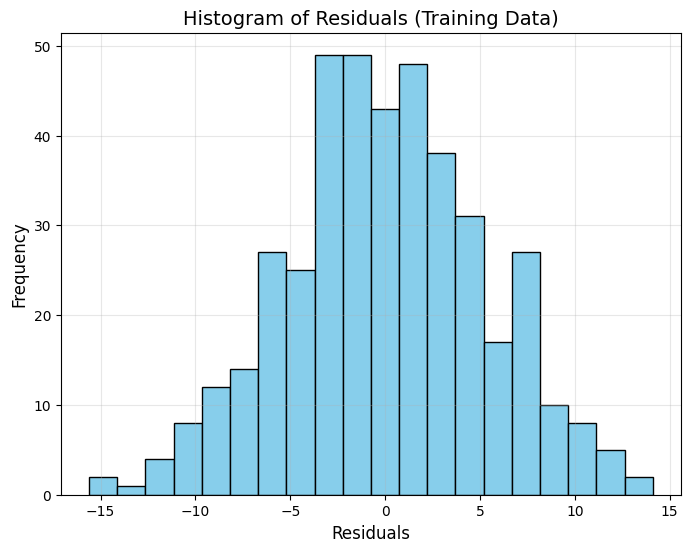

In [ ]:
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram of Residuals (Training Data)', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

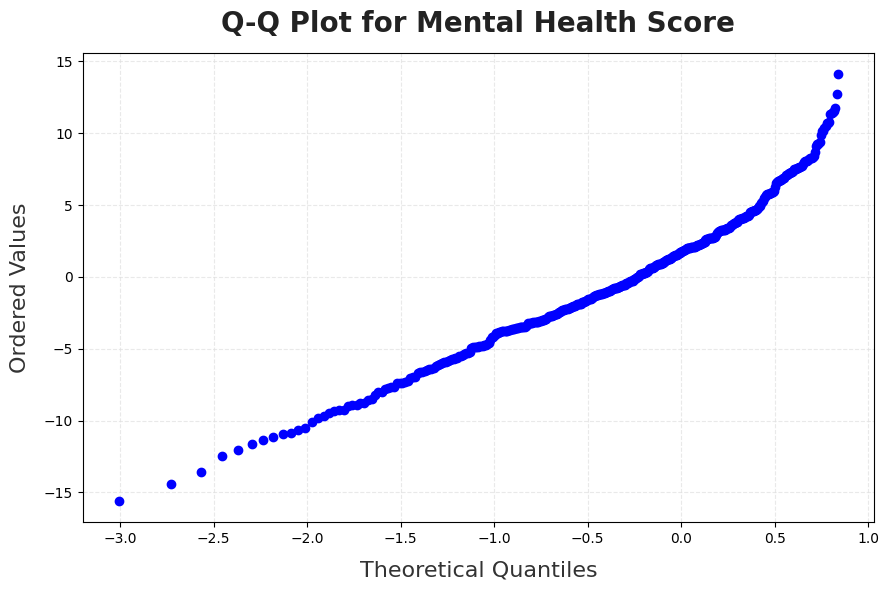

In [ ]:
plt.figure(figsize=(9, 6))
# Add the residuals as a column to the DataFrame
df["residual"] = residuals
stats.probplot(df["residual"], dist="norm", plot=plt)
plt.title('Q-Q Plot for Mental Health Score', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Theoretical Quantiles', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Ordered Values', fontsize=16, color='#333333', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7, color='#E0E0E0')
plt.tight_layout()
plt.show()

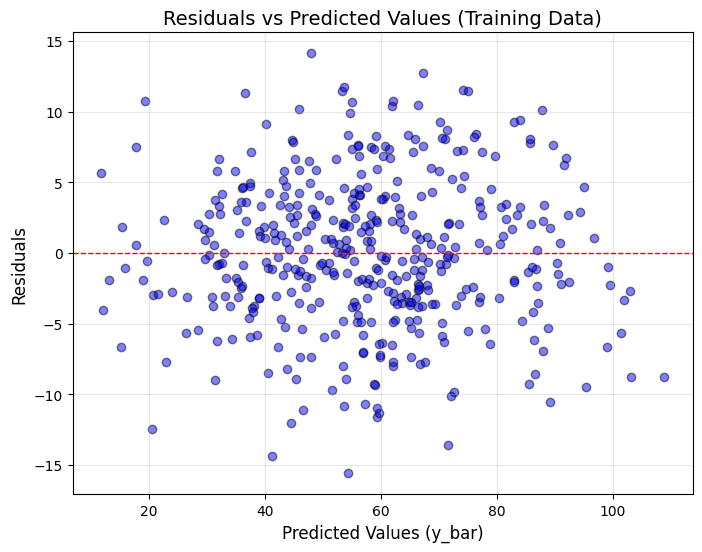

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.5, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Horizontal line at 0
plt.title('Residuals vs Predicted Values (Training Data)', fontsize=14)
plt.xlabel('Predicted Values (y_bar)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

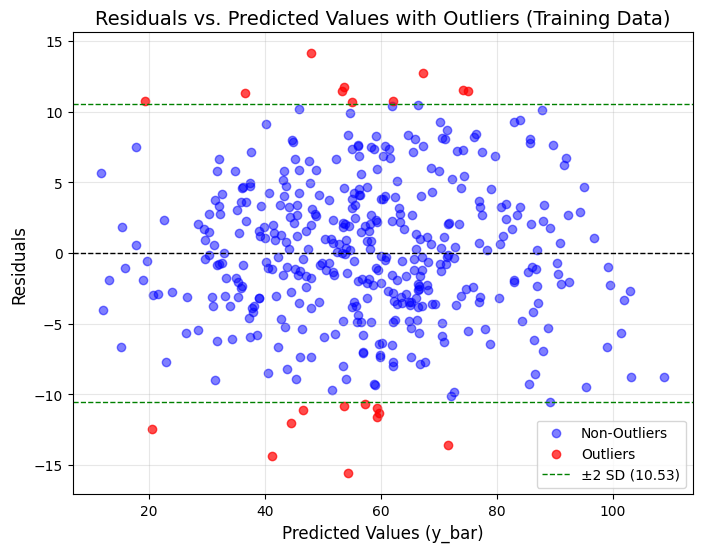

In [ ]:
residuals_std = np.std(residuals)
outlier_threshold = 2 * residuals_std
outliers = np.abs(residuals) > outlier_threshold
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred[~outliers], residuals[~outliers], color='blue', alpha=0.5, label='Non-Outliers')
plt.scatter(y_train_pred[outliers], residuals[outliers], color='red', alpha=0.7, label='Outliers')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=outlier_threshold, color='green', linestyle='--', linewidth=1, label=f'±2 SD ({outlier_threshold:.2f})')
plt.axhline(y=-outlier_threshold, color='green', linestyle='--', linewidth=1)
plt.title('Residuals vs. Predicted Values with Outliers (Training Data)', fontsize=14)
plt.xlabel('Predicted Values (y_bar)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
y_test_pred = model_train.predict(X_test_full)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nPerformance Metrics:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")


Performance Metrics:
Training MSE: 27.7272
Test MSE: 27.7724
Training R-squared: 0.9269
Test R-squared: 0.9241


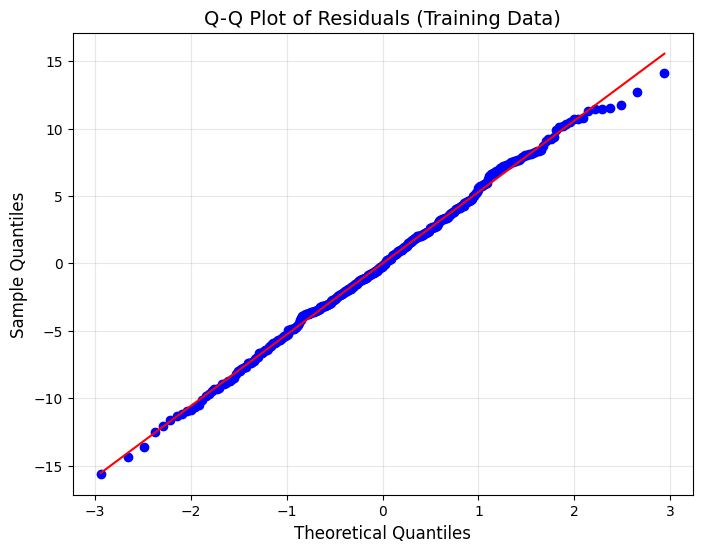


Shapiro-Wilk Test for Normality:
Statistic: 0.9974
P-value: 0.7599


In [ ]:
from scipy.stats import shapiro, probplot
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Training Data)', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


shapiro_stat, shapiro_p = shapiro(residuals)
print("\nShapiro-Wilk Test for Normality:")
print(f"Statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")

Fhomi removed

In [ ]:
import statsmodels.api as sm

# Run the regression model
X = df[["Exerq", "Ssl", "Wsl", "Fist", "Smu", "Alvl", "Dplvl", "Wlb"]]
y = df["Mhs"]
X_full = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X_full).fit()

# Display the model summary
print("Baseline First-Order Model Summary:")
print(model.summary())

# Extracting p-values for hypothesis testing
p_values = model.pvalues
print("\nP-values of independent variables:\n", p_values)

# Checking significance at α = 0.05
significant_vars = p_values[p_values < 0.05]
print("\nSignificant variables (p < 0.05):\n", significant_vars)


Baseline First-Order Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     817.4
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          2.05e-287
Time:                        22:34:30   Log-Likelihood:                -1616.3
No. Observations:                 525   AIC:                             3251.
Df Residuals:                     516   BIC:                             3289.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100

In [ ]:
from sklearn.model_selection import train_test_split
#X = df[["Exerq", "Ssl", "Wsl", "Fist", "Smu", "Fhomi", "Alvl", "Dplvl", "Wlb"]]
#y = df["Mhs"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward Selection Function
def forward_selection(X_train, y_train, significance_level=0.05):
    initial_features = []
    remaining_features = list(X_train.columns)

    while remaining_features:
        pvals = {}
        for feature in remaining_features:
            current_features = initial_features + [feature]
            X_current = sm.add_constant(X_train[current_features])
            model = sm.OLS(y_train, X_current).fit()
            pvals[feature] = model.pvalues[feature]

        # Find feature with minimum p-value
        min_pval_feature = min(pvals, key=pvals.get)
        min_pval = pvals[min_pval_feature]

        if min_pval < significance_level:
            initial_features.append(min_pval_feature)
            remaining_features.remove(min_pval_feature)
        else:
            break

    return initial_features

# Run forward selection
selected_features = forward_selection(X_train, y_train)
print("Forward Selection - Selected Features:", selected_features)

# Fit model with selected features
X_train_selected = sm.add_constant(X_train[selected_features])
model_forward = sm.OLS(y_train, X_train_selected).fit()

# Test on test set
X_test_selected = sm.add_constant(X_test[selected_features])
y_pred = model_forward.predict(X_test_selected)

# Evaluate model
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print("\nForward Selection Model Summary (Training Data):")
print(model_forward.summary())
print("\nTest Set Performance:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")

# Baseline model with all features for comparison
X_train_full = sm.add_constant(X_train)
baseline_model = sm.OLS(y_train, X_train_full).fit()
print("\nBaseline Model Summary (All Features):")
print(baseline_model.summary())

Forward Selection - Selected Features: ['Dplvl', 'Alvl', 'Wsl', 'Fist', 'Wlb', 'Ssl', 'Exerq', 'Smu']

Forward Selection Model Summary (Training Data):
                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     651.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.27e-228
Time:                        22:34:34   Log-Likelihood:                -1293.7
No. Observations:                 420   AIC:                             2605.
Df Residuals:                     411   BIC:                             2642.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

In [ ]:
def backward_elimination(X_train, y_train, significance_level=0.05):
    features = list(X_train.columns)

    while len(features) > 0:
        X_current = sm.add_constant(X_train[features])
        model = sm.OLS(y_train, X_current).fit()
        p_values = model.pvalues[1:]  # Exclude constant

        max_pval = p_values.max()
        if max_pval > significance_level:
            feature_to_remove = p_values.idxmax()
            features.remove(feature_to_remove)
        else:
            break

    return features

# Run backward elimination
selected_features = backward_elimination(X_train, y_train)
print("Backward Elimination - Selected Features:", selected_features)

# Fit model with selected features
X_train_selected = sm.add_constant(X_train[selected_features])
model_backward = sm.OLS(y_train, X_train_selected).fit()

# Test on test set
X_test_selected = sm.add_constant(X_test[selected_features])
y_pred = model_backward.predict(X_test_selected)

# Evaluate model
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print("\nBackward Elimination Model Summary (Training Data):")
print(model_backward.summary())
print("\nTest Set Performance:")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")

# Baseline model with all features for comparison
X_train_full = sm.add_constant(X_train)
baseline_model = sm.OLS(y_train, X_train_full).fit()
print("\nBaseline Model Summary (All Features):")
print(baseline_model.summary())

Backward Elimination - Selected Features: ['Exerq', 'Ssl', 'Wsl', 'Fist', 'Smu', 'Alvl', 'Dplvl', 'Wlb']

Backward Elimination Model Summary (Training Data):
                            OLS Regression Results                            
Dep. Variable:                    Mhs   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     651.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.27e-228
Time:                        22:34:40   Log-Likelihood:                -1293.7
No. Observations:                 420   AIC:                             2605.
Df Residuals:                     411   BIC:                             2642.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|

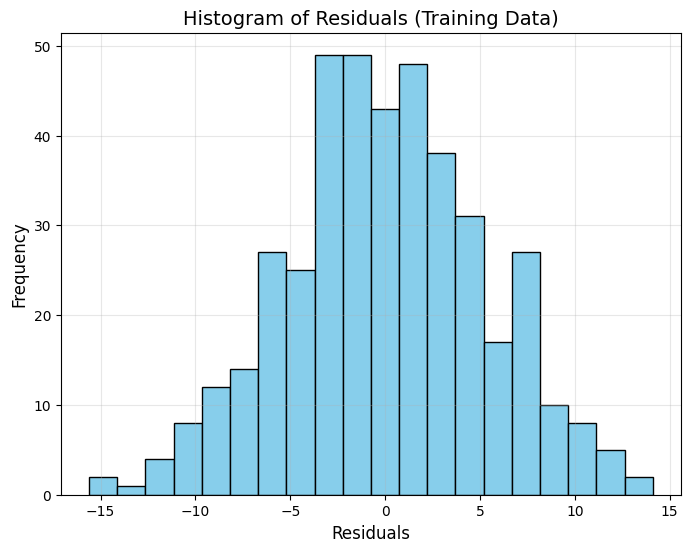

In [ ]:
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram of Residuals (Training Data)', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

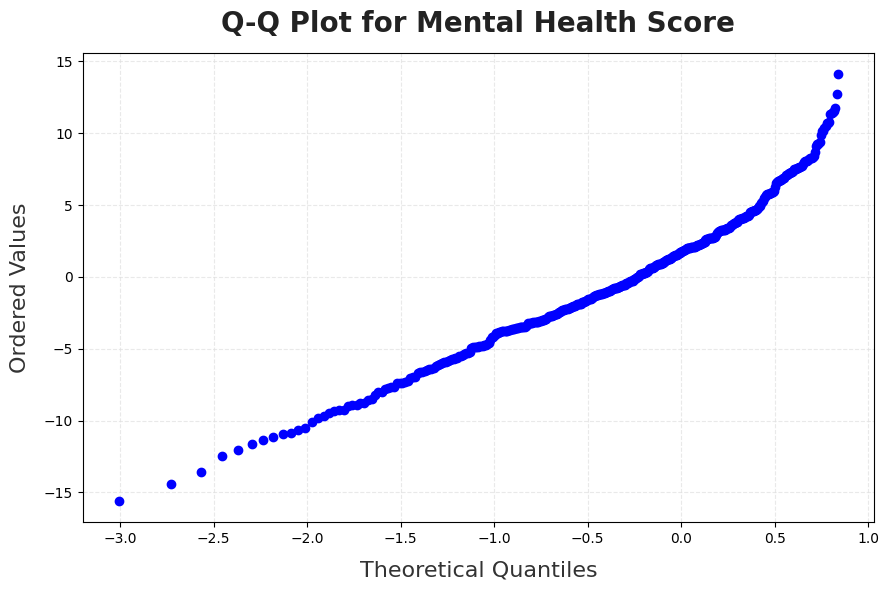

In [ ]:
plt.figure(figsize=(9, 6))
# Add the residuals as a column to the DataFrame
df["residual"] = residuals
stats.probplot(df["residual"], dist="norm", plot=plt)
plt.title('Q-Q Plot for Mental Health Score', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Theoretical Quantiles', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Ordered Values', fontsize=16, color='#333333', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7, color='#E0E0E0')
plt.tight_layout()
plt.show()

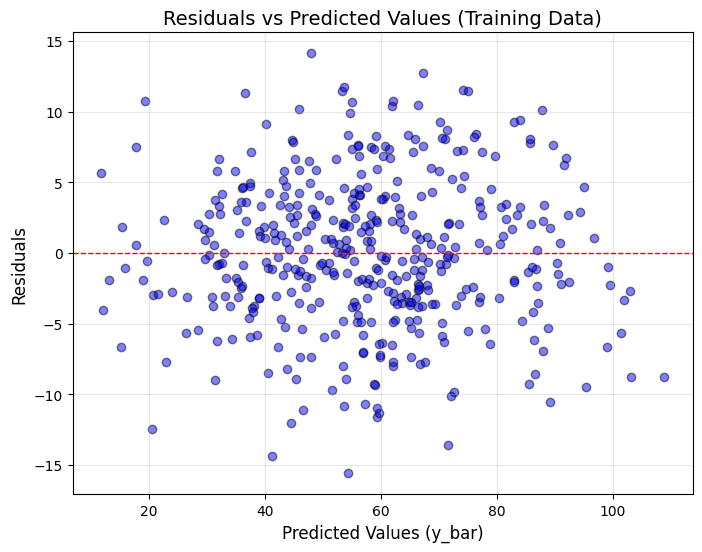

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.5, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Horizontal line at 0
plt.title('Residuals vs Predicted Values (Training Data)', fontsize=14)
plt.xlabel('Predicted Values (y_bar)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

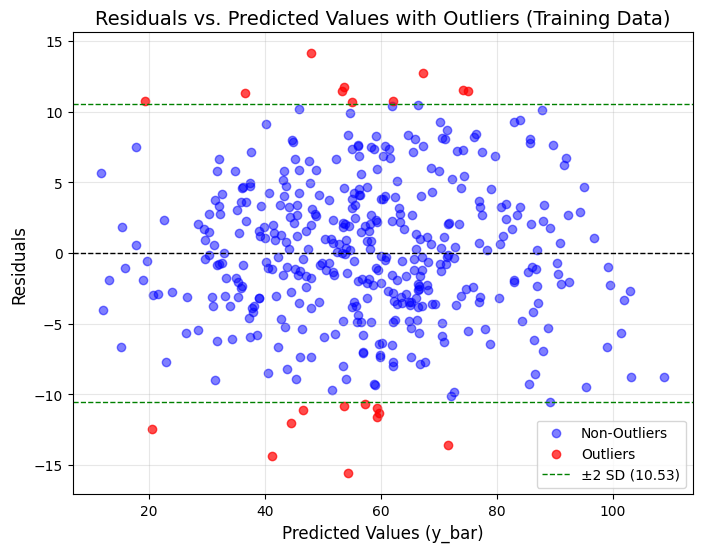

In [ ]:
residuals_std = np.std(residuals)
outlier_threshold = 2 * residuals_std
outliers = np.abs(residuals) > outlier_threshold
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred[~outliers], residuals[~outliers], color='blue', alpha=0.5, label='Non-Outliers')
plt.scatter(y_train_pred[outliers], residuals[outliers], color='red', alpha=0.7, label='Outliers')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=outlier_threshold, color='green', linestyle='--', linewidth=1, label=f'±2 SD ({outlier_threshold:.2f})')
plt.axhline(y=-outlier_threshold, color='green', linestyle='--', linewidth=1)
plt.title('Residuals vs. Predicted Values with Outliers (Training Data)', fontsize=14)
plt.xlabel('Predicted Values (y_bar)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
y_test_pred = model_train.predict(X_test_full)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nPerformance Metrics:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")


Performance Metrics:
Training MSE: 27.7272
Test MSE: 27.7724
Training R-squared: 0.9269
Test R-squared: 0.9241


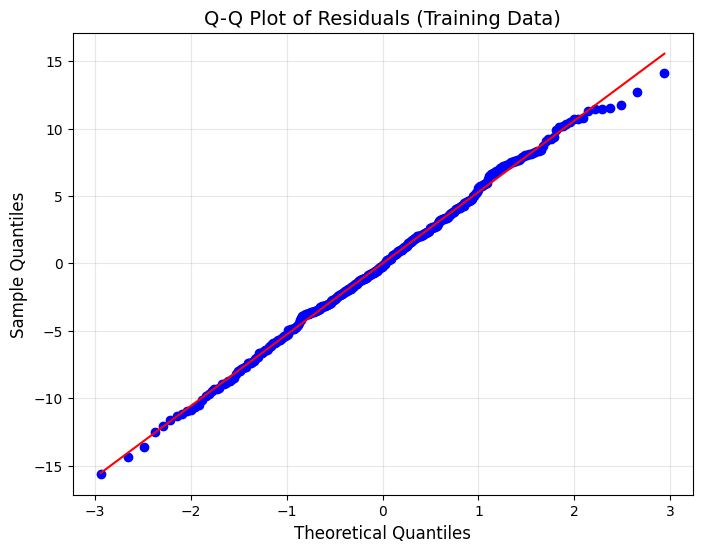


Shapiro-Wilk Test for Normality:
Statistic: 0.9974
P-value: 0.7599


In [ ]:
from scipy.stats import shapiro, probplot
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Training Data)', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


shapiro_stat, shapiro_p = shapiro(residuals)
print("\nShapiro-Wilk Test for Normality:")
print(f"Statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")

In [ ]:
# ANOVA test for categorical variables
print("ANOVA test results for categorical variables:")
for col in categorical_cols:
    groups = [df[df[col] == val]['Mhs'].values for val in df[col].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"{col}: F-value = {f_val:.4f}, p-value = {p_val:.4f}")



ANOVA test results for categorical variables:
Gender: F-value = 1.6845, p-value = 0.1865
Smkhbt: F-value = 0.0018, p-value = 0.9657
Fhomi: F-value = 4.7220, p-value = 0.0302
Suh: F-value = 0.9531, p-value = 0.3294
Teh: F-value = 1.0466, p-value = 0.3068
